
# **1. Análise Exploratória de Dados (EDA)**


In [1]:
import pandas as pd

# Carregando o dataset
uri = "https://raw.githubusercontent.com/diovani-dupont/Desafio-Cientista-de-Dados-Indicium/master/dataset/raw/teste_indicium_precificacao.csv"
df = pd.read_csv(uri)

# Verificando as primeiras linhas para entender a estrutura do dataset
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Carregando e analisando o dataset para entender suas características.

O dataset contém as seguintes colunas:

*   id: Identificador único do imóvel.
*   nome: Nome da listagem do imóvel.
*   host_id: Identificador único do anfitrião.
*   host_name: Nome do anfitrião.
*   bairro_group: Grupo de bairros (por exemplo, Manhattan, Brooklyn, etc.).
*   bairro: Nome específico do bairro.
*   latitude e longitude: Coordenadas geográficas do imóvel.
*   room_type: Tipo de quarto oferecido (por exemplo, casa/apartamento inteiro, quarto privado).
*   price: Preço da diária em dólares.
*   minimo_noites: Número mínimo de noites para a reserva.
*   numero_de_reviews: Número total de reviews.
*   ultima_review: Data da última review.
*   reviews_por_mes: Número médio de reviews por mês.
*   calculado_host_listings_count: Número de listagens que o anfitrião tem no sistema.
*   disponibilidade_365: Número de dias disponíveis para reserva nos próximos 365 dias.

*Com base nessa estrutura inicial, podemos começar a análise exploratória dos dados (EDA) para entender melhor as relações entre as variáveis, identificar possíveis outliers, valores faltantes e gerar hipóteses de negócio. Prosseguiremos com a análise exploratória, focando em estatísticas descritivas, valores faltantes e distribuições de algumas variáveis chave, como price, minimo_noites, disponibilidade_365, e numero_de_reviews.*

In [2]:
# Estatísticas descritivas básicas
desc_stats = df.describe()

# Verificando valores faltantes
missing_values = df.isnull().sum()

(desc_stats, missing_values)

(                 id       host_id      latitude     longitude         price  \
 count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
 mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
 std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
 min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
 25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
 50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
 75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
 max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
 
        minimo_noites  numero_de_reviews  reviews_por_mes  \
 count   48894.000000       48894.000000     38842.000000   
 mean        7.030085          23.274758         1.373251   
 std        20.510741          44.550991         1.680453   
 min         1.000000           0.

## Estatísticas Descritivas:

*   O dataset contém 48.894 listagens.
*   O preço médio é de aproximadamente $$152.72, mas com uma grande variação, indicada por um desvio padrão de $240.16. O preço varia de $0 a $10.000, sugerindo a presença de outliers ou valores extremos.
*   O número mínimo de noites tem uma média de aproximadamente 7 noites, com uma variação significativa (desvio padrão de aproximadamente 20.51), e valores que vão de 1 a 1.250 noites.
*   O número médio de reviews por listagem é de aproximadamente 23, com um desvio padrão de aproximadamente 44.55, indicando que algumas listagens têm muitos mais reviews do que outras.
*   A disponibilidade ao longo dos 365 dias seguintes tem uma média de aproximadamente 112 dias, com uma ampla variação.

## Valores Faltantes
*   Há 16 listagens sem nome e 21 sem nome do anfitrião.
As colunas ultima_review e reviews_por_mes têm, respectivamente, 10.052 valores faltantes cada, o que sugere que muitas listagens podem não ter recebido nenhuma review.

In [3]:
# "Preço e Disponibilidade Médios por Bairro"

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=("Preço Médio por Bairro", "Disponibilidade Média por Bairro"))

bairro_price_avg = df.groupby('bairro')['price'].mean().sort_values(ascending=False)
fig.add_trace(go.Bar(x=bairro_price_avg.index, y=bairro_price_avg.values), row=1, col=1)

bairro_availability_avg = df.groupby('bairro')['disponibilidade_365'].mean().sort_values(ascending=False)
fig.add_trace(go.Bar(x=bairro_availability_avg.index, y=bairro_availability_avg.values), row=1, col=2)

fig.update_layout(height=600, width=1200, title_text="Preço e Disponibilidade Médios por Bairro")
fig.show()


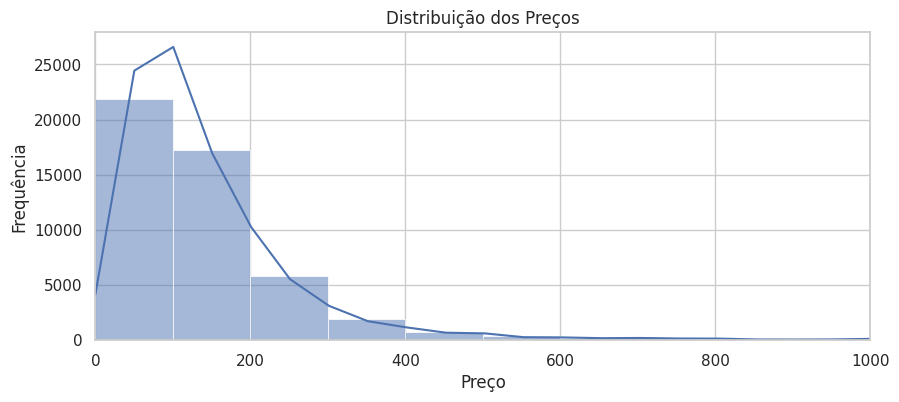

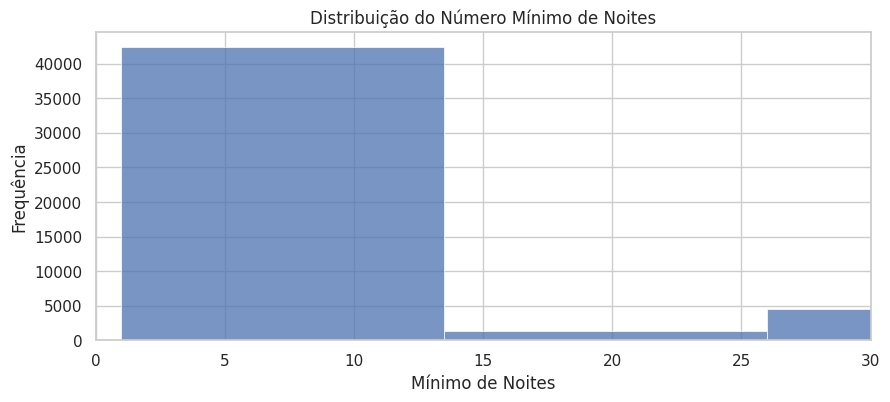

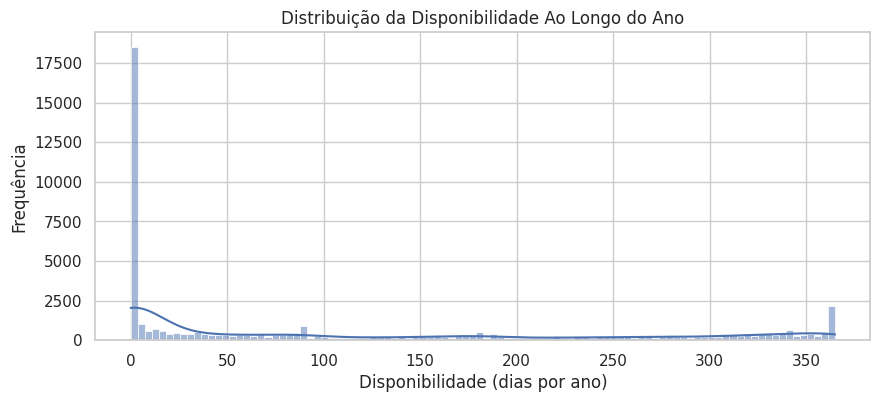

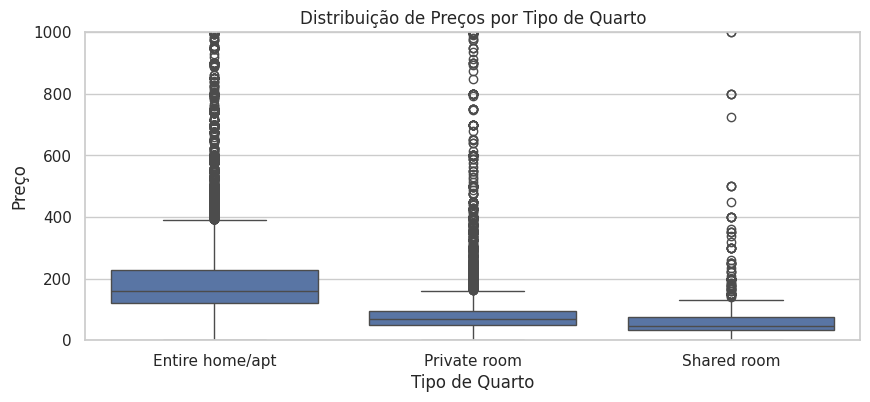

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para os gráficos
sns.set(style="whitegrid")

# Análise de distribuição de preços
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribuição dos Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.xlim(0, 1000)
plt.show()

# Análise de distribuição do número mínimo de noites
plt.figure(figsize=(10, 4))
sns.histplot(df['minimo_noites'], bins=100, kde=False)
plt.title('Distribuição do Número Mínimo de Noites')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Frequência')
plt.xlim(0, 30)
plt.show()

# Análise da disponibilidade ao longo do ano
plt.figure(figsize=(10, 4))
sns.histplot(df['disponibilidade_365'], bins=100, kde=True)
plt.title('Distribuição da Disponibilidade Ao Longo do Ano')
plt.xlabel('Disponibilidade (dias por ano)')
plt.ylabel('Frequência')
plt.show()


# Análise da Distribuição de Preços por Tipo de Quarto
plt.figure(figsize=(10, 4))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribuição de Preços por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço')
plt.ylim(0, 1000)
plt.show()

## A análise exploratória dos dados revela as seguintes informações:

*   ***Distribuição dos Preços:*** A maioria dos preços está concentrada abaixo de $200 por noite, com um pico significativo em torno de preços mais baixos. Existem alguns outliers com preços muito altos que não foram incluídos na visualização para melhorar a clareza.
*   ***Distribuição do Número Mínimo de Noites:*** A maioria das listagens exige um número mínimo de noites relativamente baixo, com a maior frequência para apenas uma noite. Há uma queda rápida na frequência ​.

*Com base nessa análise preliminar, podemos começar a realizar uma análise mais aprofundada das relações entre variáveis. Vamos iniciar investigando qual bairro ou grupo de bairros seria mais indicado para investir em um apartamento para alugar na plataforma, analisando aspectos como preço médio e demanda (indicada por número de reviews e disponibilidade).*







# **2. Análise para Investimento em Apartamento**
Para identificar onde seria mais indicado comprar um apartamento para alugar na plataforma, analisaremos a relação entre a localização (por bairro), a média de preços, e outros fatores como número de reviews e disponibilidade ao longo do ano. Isso nos ajudará a entender quais áreas têm maior demanda e potencial retorno sobre o investimento.

<ipython-input-5-874918781600>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




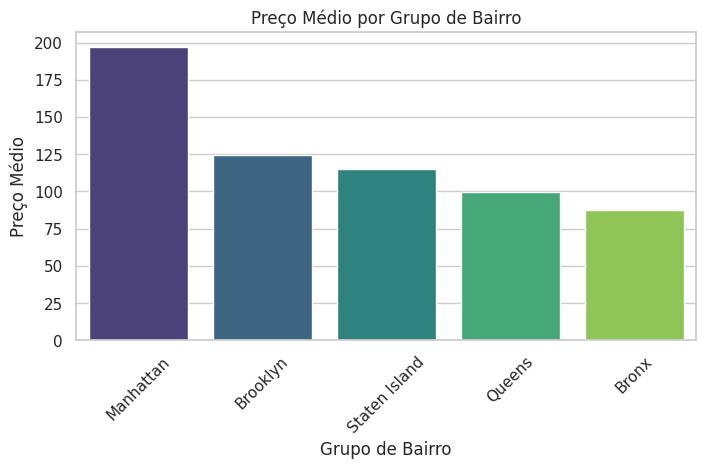

<ipython-input-5-874918781600>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




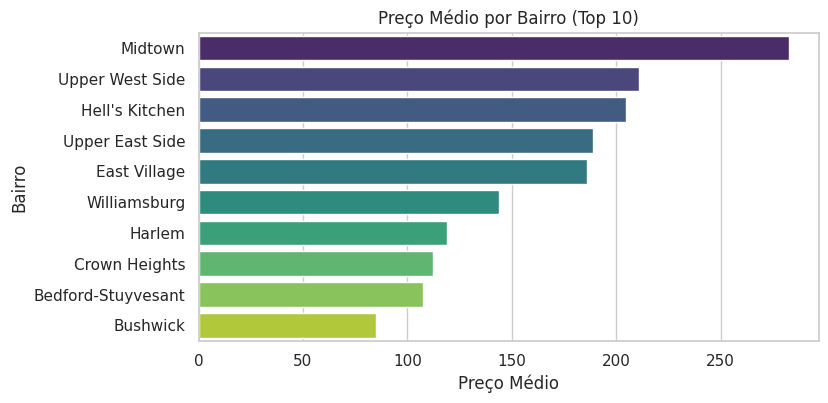

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análise do preço médio por bairro_group
preco_medio_bairro_group = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

# Análise do preço médio por bairro (limitando aos 10 bairros com mais anúncios para evitar sobrecarga de informação)
top_bairros = df['bairro'].value_counts().head(10).index
preco_medio_bairro = df[df['bairro'].isin(top_bairros)].groupby('bairro')['price'].mean().sort_values(ascending=False)

# Visualização do Preço Médio por Grupo de Bairro
plt.figure(figsize=(8, 4))
sns.barplot(x=preco_medio_bairro_group.index, y=preco_medio_bairro_group.values, palette="viridis")
plt.title('Preço Médio por Grupo de Bairro')
plt.xlabel('Grupo de Bairro')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

# Visualização do Preço Médio por Bairro (Top 10)
plt.figure(figsize=(8, 4))
sns.barplot(x=preco_medio_bairro.values, y=preco_medio_bairro.index, palette="viridis")
plt.title('Preço Médio por Bairro (Top 10)')
plt.xlabel('Preço Médio')
plt.ylabel('Bairro')
plt.show()


In [6]:
import folium

# Criando um mapa centrado nas coordenadas médias do dataset
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Adicionando marcadores para os primeiros 100 imóveis
for idx, row in df.head(100).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Preço: ${row['price']}\nBairro: {row['bairro']}",
        icon=folium.Icon(color='blue')
    ).add_to(mapa)

mapa


## 2.1 Onde Investir em um Apartamento para Alugar
Analisando a média de preços por bairro, os locais com o preço médio mais alto são:

*   **Fort Wadsworth, Staten Island:** Preço médio de $$800, mas com apenas 1 anúncio. Alta disponibilidade (365 dias), mas sem reviews, o que sugere pouca demanda ou um novo anúncio.
*   **Woodrow, Staten Island:** Preço médio de $700, também com apenas 1 anúncio e sem disponibilidade ou reviews, indicando uma situação similar ao Fort Wadsworth.
*   **Tribeca, Manhattan:** Preço médio de aproximadamente $491 com 177 anúncios. Este bairro tem uma quantidade significativa de reviews (2034 no total) e uma disponibilidade média de 126 dias ao ano, sugerindo uma demanda saudável e uma boa opção para investimento.
*   **Sea Gate, Brooklyn:** Preço médio de aproximadamente $488, com 7 anúncios. Menos demanda comparado a Tribeca, baseado no número total de reviews (10).
*   **Riverdale, Bronx:** Preço médio de aproximadamente $442, com 11 anúncios. Este bairro tem um número relativamente alto de reviews (293) e disponibilidade média de 161 dias ao ano, indicando uma demanda razoável.

**Conclusão para Investimento:** *Tribeca, em Manhattan, parece ser a opção mais atraente para investimento considerando uma combinação de preço médio alto, demanda significativa (baseada no número de reviews), e disponibilidade razoável. No entanto, é importante notar a variação de preços (desvio padrão) para entender o risco e a faixa de preços dentro de cada bairro.*

## 2.2 Análise de correlação entre o preço, o número mínimo de noites e a disponibilidade ao longo do ano mostra o seguinte:



In [7]:
# Correlação entre o preço, número mínimo de noites e disponibilidade_365
correlacao = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()

correlacao

,price,minimo_noites,disponibilidade_365
price,1.000000,0.042799,0.081833
minimo_noites,0.042799,1.000000,0.144320
disponibilidade_365,0.081833,0.144320,1.000000


In [8]:
# Calculando a matriz de correlação
corr_matrix_percentual = df.corr() * 100

# Arredondando os valores para duas casas decimais
corr_matrix_percentual_rounded = corr_matrix_percentual.round(2)

# Imprimindo a tabela de correlação percentual
print("Tabela de Correlação Percentual entre Features:")
print(corr_matrix_percentual_rounded)

Tabela de Correlação Percentual entre Features:
                                   id  host_id  latitude  longitude   price  \
id                             100.00    58.83     -0.32       9.09    1.06   
host_id                         58.83   100.00      2.02      12.70    1.53   
latitude                        -0.32     2.02    100.00       8.48    3.39   
longitude                        9.09    12.70      8.48     100.00  -15.00   
price                            1.06     1.53      3.39     -15.00  100.00   
minimo_noites                   -1.32    -1.74      2.49      -6.27    4.28   
numero_de_reviews              -31.98   -14.01     -1.54       5.91   -4.80   
reviews_por_mes                 29.18    29.64     -1.02      14.59   -3.06   
calculado_host_listings_count   13.33    15.50      1.95     -11.47    5.75   
disponibilidade_365              8.55    20.35     -1.09       8.28    8.18   

                               minimo_noites  numero_de_reviews  \
id             

<ipython-input-8-f4f7e7370e86>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



A correlação entre preço e número mínimo de noites é 0.0428, indicando uma relação muito fraca. Isso sugere que o número mínimo de noites exigido para a estadia tem um impacto muito pequeno no preço.
A correlação entre preço e disponibilidade ao longo do ano é 0.0818, também indicando uma relação fraca, mas um pouco mais forte do que a relação entre preço e número mínimo de noites. Isso pode sugerir que imóveis com maior disponibilidade tendem a ter preços ligeiramente mais altos, possivelmente devido à maior flexibilidade oferecida aos inquilinos.
Ambas as correlações são relativamente baixas, o que indica que, embora exista alguma relação entre essas variáveis e o preço, outros fatores são mais determinantes para o preço de aluguel de um imóvel na plataforma.

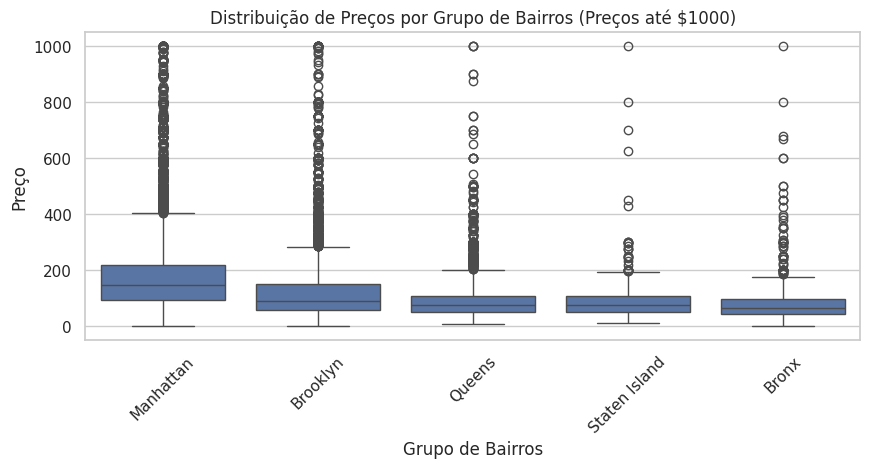

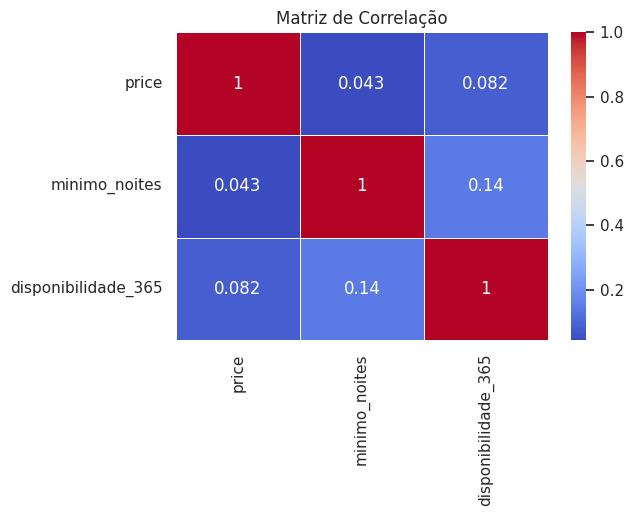

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")

# Análise de Preço por Grupo de Bairros
plt.figure(figsize=(10, 4))
sns.boxplot(x='bairro_group', y='price', data=df[df['price'] <= 1000])
plt.title('Distribuição de Preços por Grupo de Bairros (Preços até $1000)')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

# Análise de Correlação entre Preço, Número Mínimo de Noites e Disponibilidade
correlation_matrix = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


Distribuição de Preços por Grupo de Bairros
A visualização da distribuição de preços por grupo de bairros (limitando a análise a preços até $1000 para focar na maioria dos dados e evitar distorções causadas por outliers) mostra variações significativas entre os grupos. Certos grupos de bairros, como Manhattan, tendem a ter preços médios mais altos em comparação com outros, como Bronx e Staten Island. Isso sugere que, para um investimento em apartamento para aluguel, Manhattan pode oferecer preços de aluguel mais altos, mas é importante considerar também a relação custo-benefício, pois os preços de compra podem ser proporcionalmente mais altos.

Correlação entre Preço, Número Mínimo de Noites e Disponibilidade
A matriz de correlação indica que não há uma correlação forte entre o preço e o número mínimo de noites ou a disponibilidade ao longo do ano. Isso sugere que, enquanto esses fatores podem ter algum impacto no preço, eles não são determinantes principais por si só. O número mínimo de noites e a disponibilidade ao longo do ano podem ser considerados em conjunto com outras variáveis (como localização e tipo de quarto) para uma estratégia de precificação mais eficaz.

## 2.3 Padrões no texto do nome do local para lugares de mais alto valor

Para investigar se existe algum padrão no texto do nome do local para lugares de mais alto valor, vamos realizar a seguinte análise:

*   **Identificação dos Lugares de Mais Alto Valor:** Determinar um critério para classificar os lugares como de "mais alto valor". Isso pode ser feito por meio da definição de um limiar de preço, por exemplo, considerando imóveis acima do 75º percentil como de mais alto valor.
*   **Extração de Características Textuais:** Analisar os nomes dos imóveis para identificar palavras-chave ou frases comuns que possam estar associadas a preços mais altos.
*   **Análise de Frequência das Palavras:** Calcular a frequência de cada palavra nos nomes dos imóveis de mais alto valor e compará-la com a frequência nos imóveis de valor mais baixo, para identificar padrões distintivos.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Definindo um limiar para considerar imóveis de alto valor baseado no 75º percentil dos preços
high_value_threshold = df['price'].quantile(0.75)

# Filtrando imóveis de alto valor
high_value_properties = df[df['price'] > high_value_threshold]

# Preparando o texto dos nomes dos imóveis de alto valor para análise
text_data_high_value = high_value_properties['nome'].dropna()  # Removendo possíveis NaNs

# Usando o CountVectorizer para analisar as palavras mais comuns
vectorizer = CountVectorizer(stop_words='english', max_features=100)  # Limitar a 100 features para simplificar a análise
word_counts_high_value = vectorizer.fit_transform(text_data_high_value)
sum_words_high_value = word_counts_high_value.sum(axis=0)
words_freq_high_value = [(word, sum_words_high_value[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq_high_value_sorted = sorted(words_freq_high_value, key=lambda x: x[1], reverse=True)

# Exibindo as 10 palavras mais frequentes nos nomes dos imóveis de alto valor
words_freq_high_value_sorted[:10]


[('bedroom', 1916),
 ('apartment', 1802),
 ('apt', 1481),
 ('village', 1070),
 ('studio', 1021),
 ('east', 1004),
 ('luxury', 950),
 ('park', 913),
 ('loft', 891),
 ('spacious', 877)]

## A análise das palavras mais frequentes nos nomes dos imóveis de mais alto valor revela os seguintes padrões:


* 'bedroom' (quarto): Sugerindo que a descrição do número de quartos é um atrativo para imóveis de alto valor.
* 'apartment', 'apt': Indicando que termos genéricos para espaços habitacionais são comuns, possivelmente para destacar a oferta de um espaço completo.
* 'village': Pode indicar uma localização desejável ou um sentimento de comunidade.
* 'studio': Refere-se a um tipo específico de layout, que apesar de ser geralmente menor, pode estar em alta demanda em determinadas áreas ou apresentar características de luxo.
* 'east': Possivelmente relacionado a uma localização específica, como o East Village ou o Upper East Side em Manhattan, áreas conhecidas por seus imóveis de alto valor.
* 'luxury': Explicitamente indica que o imóvel possui características de luxo.
* 'park': Pode referir-se à proximidade de parques ou a áreas com nomes que incluem "Park", que são frequentemente associadas a um maior valor imobiliário.
* 'loft': Tipo de imóvel que geralmente oferece espaços amplos e pode ser mais caro.
* 'spacious' (espaçoso): Indica que a amplidão do espaço é um fator relevante para o preço.


*Esses resultados sugerem que termos relacionados ao tamanho (como "spacious"), tipo de imóvel ("apartment", "studio", "loft"), características de luxo ("luxury"), e localizações específicas ("village", "east", "park") são frequentemente utilizados em imóveis de mais alto valor. Isso pode indicar que os anunciantes enfatizam essas características para atrair inquilinos dispostos a pagar mais por essas qualidades.*

# **4. Previsão do preço a partir dos dados**

Explicação da Previsão do Preço:

**Tipo de Problema:** Problema de regressão, pois o objetivo é prever o preço de aluguel de um imóvel (um valor contínuo) com base em suas características.

**Variáveis Utilizadas:**
Selecionadas: latitude, longitude, minimo_noites, numero_de_reviews, reviews_por_mes, calculado_host_listings_count, disponibilidade_365, room_type, e bairro_group.

**Transformações:** Variáveis categóricas como room_type e bairro_group são transformadas usando one-hot encoding para converter as categorias em forma numérica, permitindo que o modelo as utilize para previsões.

**Modelo Escolhido:** *Random Forest Regressor.*
* Prós: Capaz de capturar relações não-lineares e interações entre características sem a necessidade de transformações manuais complexas; robusto a outliers; menos propenso a overfitting que árvores de decisão individuais.

* Contras: Mais complexo e computacionalmente mais intensivo que modelos lineares; a interpretabilidade do modelo pode ser desafiadora devido à sua natureza de "caixa preta".

**Medida de Performance:** RMSE (Root Mean Square Error) e R².
Por quê?: RMSE fornece uma estimativa da magnitude dos erros de previsão, penalizando mais fortemente grandes erros; R² indica a proporção da variância dos preços que é explicada pelas variáveis independentes no modelo, fornecendo uma noção da qualidade do ajuste.

## 4.1 Implementação

In [11]:
# Tratando valores faltantes
df['nome'].fillna('Desconhecido', inplace=True)
df['host_name'].fillna('Desconhecido', inplace=True)
df['reviews_por_mes'].fillna(0, inplace=True)

# Convertendo 'ultima_review' para datetime, tratando NaN como NaT (Not a Time)
df['ultima_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')

# Codificação de variáveis categóricas com one-hot encoding
df = pd.get_dummies(df, columns=['room_type', 'bairro_group'])

# Verificando as primeiras linhas do dataframe tratado
df.head()


,id,nome,host_id,host_name,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,...,calculado_host_listings_count,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,2,355,1,0,0,0,0,1,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,1,365,0,1,0,0,0,1,0,0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,1,194,1,0,0,0,1,0,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,1,0,1,0,0,0,0,1,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,74,...,1,129,1,0,0,0,0,1,0,0


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import joblib

# Carregando o DataFrame após dumificação
# Preparação dos dados
features = df.drop(['price', 'id', 'nome', 'host_id', 'host_name', 'bairro', 'ultima_review'], axis=1)
target = df['price']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definindo o modelo e os parâmetros para o GridSearch
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [250, 500, 750],  # Número de árvores
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias em cada folha
}

# Configuraçao do GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Treinar o modelo usando o GridSearchCV
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor modelo
print("Melhores Parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Avaliação do melhor modelo
y_pred = best_model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Preparando os dados do apartamento específico com o melhor modelo
features_apartment = df.drop(['price', 'id', 'nome', 'host_id', 'host_name', 'bairro', 'ultima_review'], axis=1).iloc[0:1]
suggested_price = best_model.predict(features_apartment)
print("Sugestão de Preço:", suggested_price[0])


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Melhores Parâmetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 750}
RMSE: 209.43831909817155
R²: 0.12106064335799116
Sugestão de Preço: 325.287259057608


# **5. Modelo desenvolvido no formato .pkl.**

In [14]:
# Salvando o modelo
joblib.dump(model, 'rental_pricing_model.pkl')

['rental_pricing_model.pkl']